# PBL_1 - Logistic Regression

## [ Reading the MNIST ]

In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import time

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""


def read(dataset="training", path="."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)


def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot as plt
    import matplotlib as mpl
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    
    plt.show()

In [2]:
training_list = list(read(dataset="training", path=".\dataset"))
test_list = list(read(dataset="testing", path=".\dataset"))

In [3]:
print(len(training_list), len(test_list))

60000 10000


In [4]:
# label : The answer / pixel : The binary data of img
label, pixel = training_list[0]

In [5]:
print("The answer : {}".format(label))  # The answer

The answer : 5


In [6]:
print(pixel)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

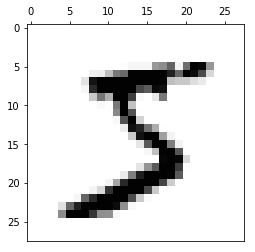

In [7]:
show(pixel)

## [ Analysis using Logistic Regression ]

In [8]:
from sklearn.linear_model import LogisticRegression

# Default Classification
clf_1 = LogisticRegression(C=0.05,
                           multi_class='multinomial',
                           penalty='l1', solver='saga', tol=0.1, n_jobs=-1)


# Flatten 작업
def get_dataset_list(training_list):
    flatted_pixel_list = list()
    label_list = list()

    for i in range(len(training_list)):
        label, pixel = training_list[i]
        flatted_pixel_list.append(np.array(pixel).flatten())
        label_list.append(label)

    return flatted_pixel_list, label_list


In [9]:
# Flatten Training-data-set & Test-data-set
training_flatted_pixel_list, training_label_list = get_dataset_list(training_list)
test_flatted_pixel_list, test_label_list = get_dataset_list(test_list)

In [10]:
# Fitting process
start = time.time()
clf_1.fit(training_flatted_pixel_list, training_label_list)
end = time.time()

In [11]:
print("Elapsed Time : {}".format(end - start))

Elapsed Time : 53.70196533203125


In [12]:
score_1 = clf_1.score(test_flatted_pixel_list, test_label_list)
# score() :: test 데이터를 통해 모델을 평가하는 method
# (정확히 분류된 샘플의 비율을 추출)

print("The test score : {}".format(score_1))

The test score : 0.9246


## [ Modifying Parameters ]
### (Before using GS, tried to find the best 'C value')

In [14]:
"""
C :: 
- C = 1 / lambda
- 가장 accuracy 가 높은 최적의 C 를 찾아야 한다. 
- 일반적으로 C의 값이 작을수록 적합한 모델이 나온다. (그렇다고 너무 작으면 안된다.)

tol ::
- 정지 기준에 대한 허용 오차. 
- 즉, tol 이 작을수록 더 오래걸리지만 정확해진다.
- 여기선 0.1 로 fixed
"""
print()

### - Score Values for C ranges of [0.01, 1, 0.05]

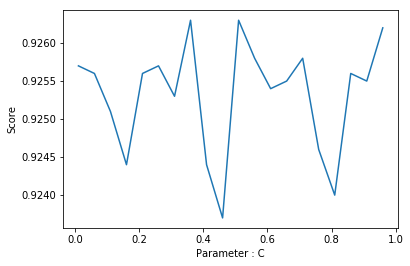

In [15]:
best_values = {"best_c": 0, "best_score": 0}

arr_score = list()
arr_c = np.arange(0.01, 1, 0.05)
start = time.time()
for c in range(len(arr_c)):
    clf_m = LogisticRegression(C=1.0,
                           multi_class='multinomial',
                           penalty='l1', solver='saga', tol=0.1, n_jobs=-1)
    
    clf_m.set_params(C=arr_c[c])
    clf_m.fit(training_flatted_pixel_list, training_label_list)
    score_temp = clf_m.score(test_flatted_pixel_list, test_label_list)
    arr_score.append(score_temp)
    
    if best_values["best_score"] < score_temp:
        best_values["best_c"] = arr_c[c]
        best_values["best_score"] = score_temp
end = time.time()

plt.plot(arr_c, arr_score)
plt.xlabel("Parameter : C")
plt.ylabel("Score")
plt.show()

In [16]:
print("The best value of C : {}".format(best_values["best_c"]))
print("The best value of score at the C : {}".format(best_values["best_score"]))
print("Elapsed Time : {}".format(end - start))

The best value of C : 0.36000000000000004
The best value of score at the C : 0.9263
Elapsed Time : 1064.3569166660309


### - Score values for C ranges of [1, 100, 5]

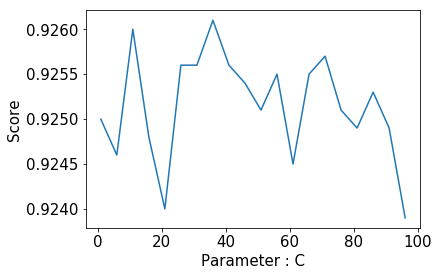

In [43]:
best_values = {"best_c": 0, "best_score": 0}

arr_score = list()
arr_c = np.arange(1, 100, 5)

start = time.time()
for c in range(len(arr_c)):
    clf_m = LogisticRegression(C=1.0,
                               multi_class='multinomial',
                               penalty='l1', solver='saga', tol=0.1, n_jobs=-1)
    
    clf_m.set_params(C=arr_c[c])
    clf_m.fit(training_flatted_pixel_list, training_label_list)
    score_temp = clf_m.score(test_flatted_pixel_list, test_label_list)
    arr_score.append(score_temp)
    
    if best_values["best_score"] < score_temp:
        best_values["best_c"] = arr_c[c]
        best_values["best_score"] = score_temp
end = time.time()

plt.plot(arr_c, arr_score)
plt.xlabel("Parameter : C")
plt.ylabel("Score")
plt.show()

In [44]:
print("The best value of C : {}".format(best_values["best_c"]))
print("The best value of score at the C : {}".format(best_values["best_score"]))
print("Elapsed Time : {}".format(end - start))

The best value of C : 36
The best value of score at the C : 0.9261
Elapsed Time : 1118.8708431720734


---

# Using 'K-fold Cross Validation' and 'Grid Search'

## K-fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score

"""
위에서 최적의 C value 인 C = 0.36 을 찾음
이를 바탕으로 K-fold 교차 검증을 실시

총 60개의 k 로 나눠 실행
(k 가 클수록 더 세밀한 검증 가능)

즉, 잘개 쪼개진 각 샘플마다 정확도를 각각 측정한다,
그리고 전체 평균을 내어 이 모델의 정확도가 대략 ~ 일 것이다 라고 기대 할 수 있음.
"""

clf = LogisticRegression(C=0.36,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1, n_jobs=-1)

start = time.time()
scores = cross_val_score(estimator=clf,
                         X=training_flatted_pixel_list, y=training_label_list,
                         cv=60, n_jobs=-1)
end = time.time()

print("CV accuracy scores : {}".format(scores))
print("CV accuracy : {} +/- {}".format(np.mean(scores), np.std(scores)))
print("Elapsed Time : {}".format(end - start))

CV accuracy scores : [0.91451292 0.92047714 0.93141153 0.9333996  0.93141153 0.93240557
 0.92743539 0.90954274 0.90854871 0.92636816 0.94129353 0.90438247
 0.90537849 0.91832669 0.89342629 0.90836653 0.92231076 0.92231076
 0.92921236 0.93419741 0.93220339 0.91716567 0.923      0.926
 0.917      0.94294294 0.90790791 0.92992993 0.91991992 0.92092092
 0.9019019  0.90180361 0.91182365 0.93887776 0.9258517  0.92084168
 0.91883768 0.89478958 0.92076229 0.91273821 0.9227683  0.89568706
 0.89869609 0.93373494 0.91767068 0.9126506  0.90863454 0.92068273
 0.9186747  0.89457831 0.92068273 0.93273092 0.89959839 0.92269076
 0.92971888 0.93674699 0.93373494 0.9246988  0.95883534 0.95080321]
CV accuracy : 0.9205659373758864 +/- 0.013838946353014614
Elapsed Time : 273.36127495765686


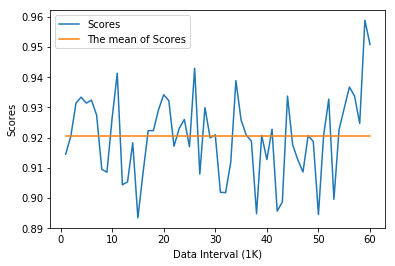

In [22]:
"""
이를 그래프로 나타내고,
Scores 의 평균의 기대값을 추출.
"""
X_1 = np.arange(1, 61, 1)
Y_1 = scores

X_2 = np.zeros(60)
Y_2 = [x + np.mean(scores) for x in X_2]

plt.plot(X_1, Y_1, label="Scores")
plt.plot(X_1, Y_2, label="The mean of Scores")

plt.xlabel("Data Interval (1K)")
plt.ylabel("Scores")
plt.legend()
plt.show()

## Tuning hyperparameters using Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

clf.get_params()

{'C': 0.36,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.1,
 'verbose': 0,
 'warm_start': False}

In [24]:
"""
GD 를 이용하여, 최상의 parameter 를 찾는다.
파라미터를 분석해보니, 실제로 socre 에 영향을 미치는 파라미터는 C, class_weigt, penalty 세개임을 알 수 있었다.

이 때, C 의 간격(interval)은 log 의 크기로 증가하도록 한다. (간격의 비례가 일정하도록)

즉, 
값이 작을 때의 간격은 작고,
클 때의 간격은 크다.
"""


c_range = [0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10, 25, 50, 75, 100]

clf_gs = LogisticRegression(C=0.1,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1, n_jobs=-1)

param_grid = {'C': c_range,
              'class_weight': [None, 'balanced'],
              #  'dual': [False],
              #  'fit_intercept': True,
              #  'intercept_scaling': 1,
              #  'max_iter': 100,
              #  'multi_class': ['multinomial'],  # 다항식일 경우 multinomial, 이진 문제일 경우 ovr
              #  'n_jobs': -1,
              'penalty': ['l1', 'l2']
              #  'random_state': None,
              #  'solver': ['saga']
              #  'tol': 0.1,
              #  'verbose': 0,
              #  'warm_start': False
             }

gs = GridSearchCV(estimator=clf_gs,
                  param_grid=param_grid,
                  scoring="accuracy",
                  cv=10,
                  n_jobs=-1)

start = time.time()
gs = gs.fit(training_flatted_pixel_list, training_label_list)
end = time.time()

print("Elapsed Time : {}".format(end - start))


Elapsed Time : 2039.8155691623688


In [25]:
data_result = gs.cv_results_
# data_result

In [27]:
"""
위로부터 얻은 결과를 각 케이스별로 분석

l1_cw_none_list : L1, Class_Weight = None
l1_cw_bal_list : L1, Class_Weight = "balanced"
l2_cw_none_list : L2, Class_Weight = None
l2_cw_bal_list : L2, Class_Weight = "balanced"
"""


l1_cw_none_list = list()
l1_cw_bal_list = list()
l2_cw_none_list = list()
l2_cw_bal_list = list()


for i in range(len(data_result["params"])):
    if data_result["params"][i]["penalty"] == "l1":
        if data_result["params"][i]["class_weight"] is None:
            l1_cw_none_list.append(data_result["mean_test_score"][i])
        elif data_result["params"][i]["class_weight"] == "balanced":
            l1_cw_bal_list.append(data_result["mean_test_score"][i])
    elif data_result["params"][i]["penalty"] == "l2":
        if data_result["params"][i]["class_weight"] is None:
            l2_cw_none_list.append(data_result["mean_test_score"][i])
        elif data_result["params"][i]["class_weight"] == "balanced":
            l2_cw_bal_list.append(data_result["mean_test_score"][i])

print(l1_cw_none_list)
print(l1_cw_bal_list)
print(l2_cw_none_list)
print(l2_cw_bal_list)

[0.9205833333333333, 0.9202333333333333, 0.9209166666666667, 0.9208833333333334, 0.9201833333333334, 0.9200833333333334, 0.92, 0.9199166666666667, 0.9202166666666667, 0.9199333333333334, 0.9197, 0.9204666666666667, 0.9204666666666667, 0.9205666666666666, 0.9202333333333333, 0.92025, 0.9198666666666667]
[0.9206333333333333, 0.9209333333333334, 0.92025, 0.9205333333333333, 0.92005, 0.9209, 0.9205666666666666, 0.9205333333333333, 0.9196666666666666, 0.9208166666666666, 0.92055, 0.9208333333333333, 0.9204, 0.9202, 0.9203833333333333, 0.9199833333333334, 0.9198666666666667]
[0.9193833333333333, 0.9198666666666667, 0.9196666666666666, 0.9198833333333334, 0.9196833333333333, 0.91935, 0.9195333333333333, 0.91965, 0.9194166666666667, 0.9198, 0.9200166666666667, 0.9197166666666666, 0.91955, 0.9197666666666666, 0.91985, 0.9197666666666666, 0.9197833333333333]
[0.9194166666666667, 0.9194666666666667, 0.9194, 0.9200833333333334, 0.9196333333333333, 0.9195333333333333, 0.9193666666666667, 0.91965, 0

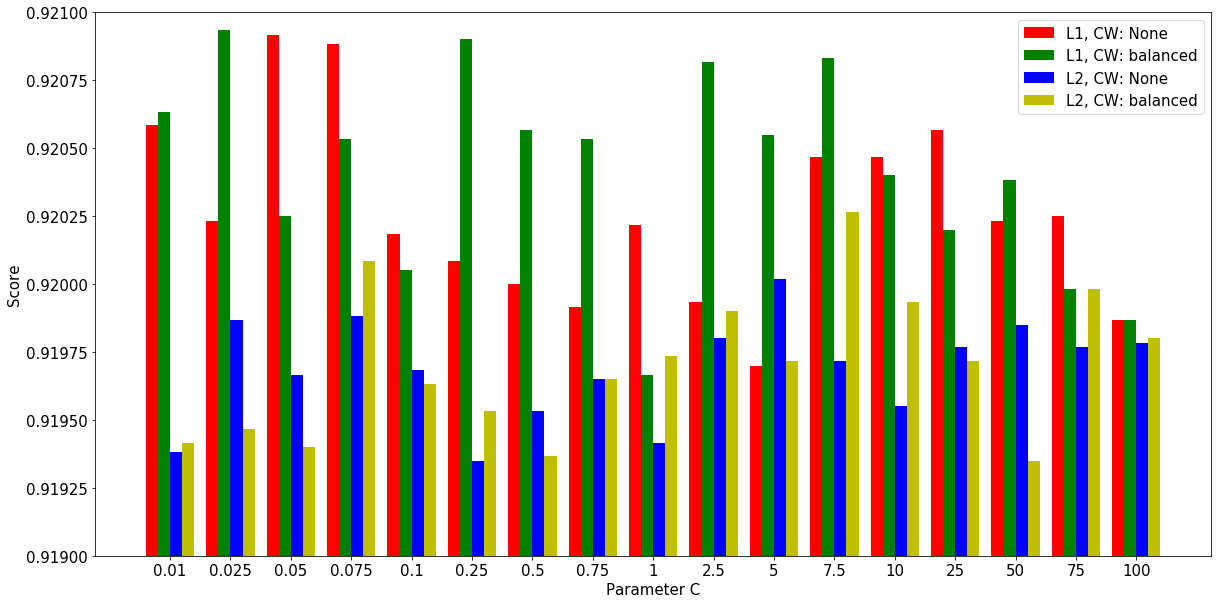

In [28]:
"""
그리고 이를 그래프로 확인

직관적으로 초록색(L1, Class_Weight = "balanced") 인 경우가 가장 효율적임을 알 수 있다.
"""


import matplotlib

X = np.arange(len(l1_cw_bal_list))
width = 0.20
labels = tuple([0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10, 25, 50, 75, 100])

matplotlib.rcParams.update({'font.size': 15})
plt.figure(figsize=(20, 10))
plt.bar(X, l1_cw_none_list, color="r", width=width)
plt.bar(X + width, l1_cw_bal_list, color="g", width=width)
plt.bar(X + (width * 2), l2_cw_none_list, color="b", width=width)
plt.bar(X + (width * 3), l2_cw_bal_list, color="y", width=width)
plt.ylim([0.919, 0.921])
plt.xticks(X + (width * 3/2), labels)
plt.xlabel("Parameter C")
plt.ylabel("Score")
plt.legend(["L1, CW: None", "L1, CW: balanced", "L2, CW: None", "L2, CW: balanced"])

plt.show()

In [29]:
print("The mean of 'L1, CW: None' : {}".format(np.mean(l1_cw_none_list)))
print("The mean of 'L1, CW: balanced' : {}".format(np.mean(l1_cw_bal_list)))
print("The mean of 'L2, CW: None' : {}".format(np.mean(l2_cw_none_list)))
print("The mean of 'L2, CW: balanced' : {}".format(np.mean(l2_cw_bal_list)))

The mean of 'L1, CW: None' : 0.920264705882353
The mean of 'L1, CW: balanced' : 0.9204176470588237
The mean of 'L2, CW: None' : 0.9196872549019608
The mean of 'L2, CW: balanced' : 0.9197029411764706


In [30]:
"""
평균을 내보고, accuracy 가 높은 순으로 순서를 정했을 때,
실제로 L1, Class_Weight = "balanced" 의 케이스가 가장 정확도가 높음을 알 수 있다.
"""


method_dict = dict()

method_dict["l1_cw_none_list"] = np.mean(l1_cw_none_list)
method_dict["l1_cw_bal_list"] = np.mean(l1_cw_bal_list)
method_dict["l2_cw_none_list"] = np.mean(l2_cw_none_list)
method_dict["l2_cw_bal_list"] = np.mean(l2_cw_bal_list)

sorted_method_list = sorted(method_dict.items(), key=lambda kv: kv[1], reverse=True)
for i in range(len(sorted_method_list)):
    print("{} : {}".format(sorted_method_list[i][0], sorted_method_list[i][1]))

l1_cw_bal_list : 0.9204176470588237
l1_cw_none_list : 0.920264705882353
l2_cw_bal_list : 0.9197029411764706
l2_cw_none_list : 0.9196872549019608


In [31]:
"""
이제 위 GD 의 결과를 통해 얻은
최상의 parameter 에서 fit 을 해보고
Test Data-set 에서의 accuracy 를 구해보자.
"""


clf_new = gs.best_estimator_

start = time.time()
clf_new.fit(training_flatted_pixel_list, training_label_list)
end = time.time()

print(clf_new)
print("Elapsed time : {}".format(end - start))

LogisticRegression(C=0.025, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=-1, penalty='l1',
          random_state=None, solver='saga', tol=0.1, verbose=0,
          warm_start=False)
Elapsed time : 64.0015377998352


In [36]:
score_new = clf_new.score(test_flatted_pixel_list, test_label_list)
print("The test score using GD : {}".format(score_new))

The test score using GD : 0.9259
